In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('C:/Users/farav/OneDrive/Documentos/Python Scripts')

In [3]:
base_gral_senti_fecha = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_gral_senti_fecha.head()

,titular,fecha,diario,sentimiento
0,"""Mirá la ceremonia de inauguración de los Jueg...",2021-07-23,elobse,NEU
1,"""El contrasentido del clásico: Peńarol perdió ...",2021-07-23,elobse,NEU
2,"""Los sueldos de $ 200.000 en el Directorio de ...",2021-07-23,elobse,NEU
3,"""żDónde se podrán ver los Juegos Olímpicos de ...",2021-07-23,elobse,NEU
4,"""Crece interés de argentinos por Montevideo: c...",2021-07-23,elobse,POS


In [4]:
base_sent_ladiar = base_gral_senti_fecha[base_gral_senti_fecha['diario'] == 'ladiar']
base_sent_ladiar.head(10)

,titular,fecha,diario,sentimiento
37487,"""Mujica: la injerencia del gobierno nacional e...",2021-07-22,ladiar,NEG
37488,"""Trabajadores de empresas y entes públicos ase...",2021-07-22,ladiar,NEG
37489,"""Merkel llegó a un acuerdo con Biden sobre el ...",2021-07-22,ladiar,NEU
37490,"""Afganistán: Talibanes aseguran controlar casi...",2021-07-22,ladiar,NEU
37491,"""El abogado Fabrizio Bacigalupo fue condenado ...",2021-07-22,ladiar,NEU
37492,"""Allanamientos sin órdenes, abuso policial y f...",2021-07-22,ladiar,NEG
37493,"""Brasil: supuestas amenazas del ministro de De...",2021-07-22,ladiar,NEG
37494,"""Gobierno chino rechazó una segunda investigac...",2021-07-22,ladiar,NEU
37495,"""Coronavirus: ocho fallecimientos y 306 casos ...",2021-07-22,ladiar,NEG
37496,"""Murió el músico argentino Palo Pandolfo"" ...",2021-07-22,ladiar,NEG


In [5]:
!python -m pip install nltk

In [ ]:
!python -m nltk.downloader all

In [7]:
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [8]:
data_ladiar = base_sent_ladiar['titular']
data_ladiar.head()

37487    "Mujica: la injerencia del gobierno nacional e...
37488    "Trabajadores de empresas y entes públicos ase...
37489    "Merkel llegó a un acuerdo con Biden sobre el ...
37490    "Afganistán: Talibanes aseguran controlar casi...
37491    "El abogado Fabrizio Bacigalupo fue condenado ...
Name: titular, dtype: object

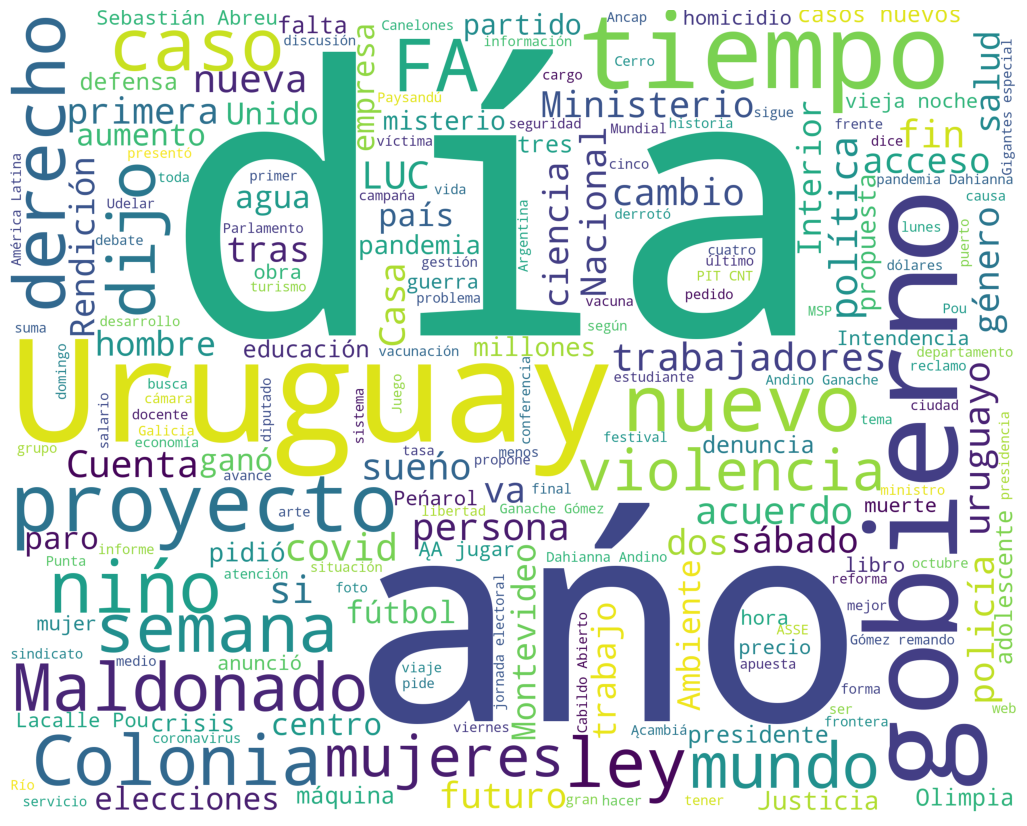

In [9]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    ''' Limpio el texto eliminando hashtags, menciones, links y retweets.
    '''
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('¿')
                                and not word.startswith('¡')
                                and not word.startswith('"')
                                and not word.endswith('?')
                                and not word.endswith('!')
                                and not word.endswith('"')
                                and word != '$'
                            ])
    wordcloud = WordCloud(stopwords=stopwords.words("spanish"),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
#print("Palabras positivas")
wordcloud_draw(data_ladiar,'white')
#print("Palabras negativas")
#wordcloud_draw(train_neg)

In [12]:
data_sent_ladiar = base_sent_ladiar[['titular', 'sentimiento']]

data_sent_ladiar_pos = data_sent_ladiar[data_sent_ladiar['sentimiento'] == 'POS']
data_sent_ladiar_pos = data_sent_ladiar['titular']
data_sent_ladiar_neg = data_sent_ladiar[data_sent_ladiar['sentimiento'] == 'NEG']
data_sent_ladiar_neg = data_sent_ladiar['titular']
data_sent_ladiar_neu = data_sent_ladiar[data_sent_ladiar['sentimiento'] == 'NEU']
data_sent_ladiar_neu = data_sent_ladiar['titular']

Palabras positivas


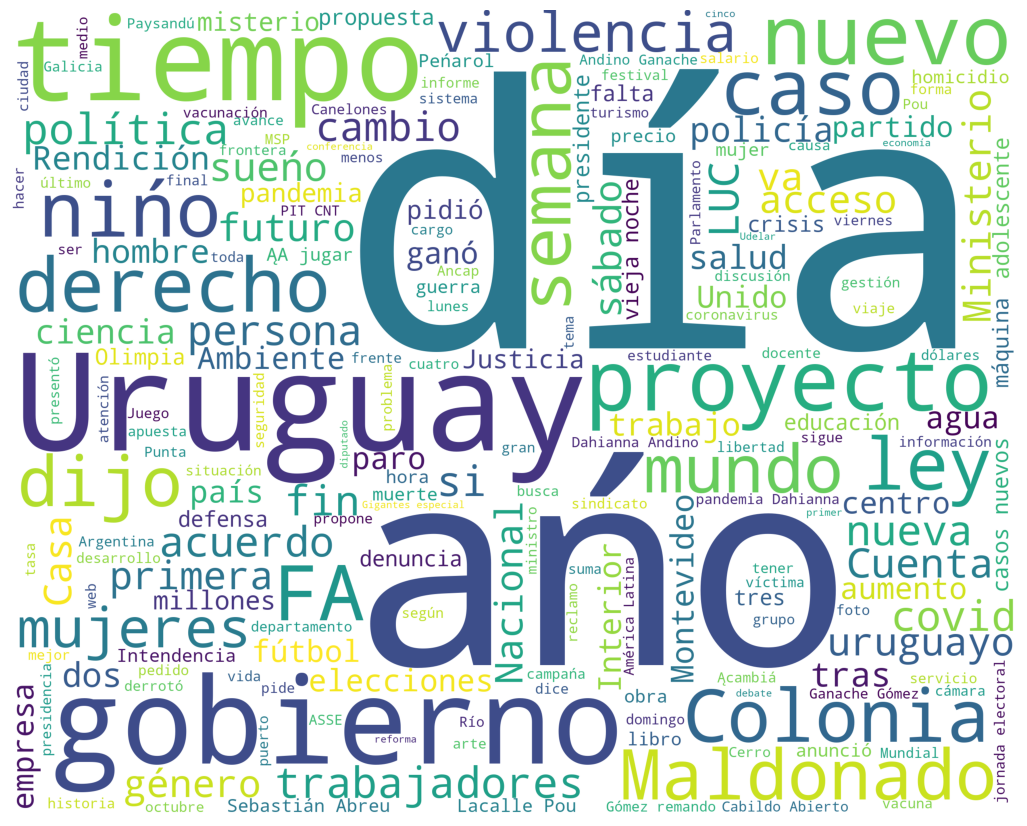

Palabras negativas


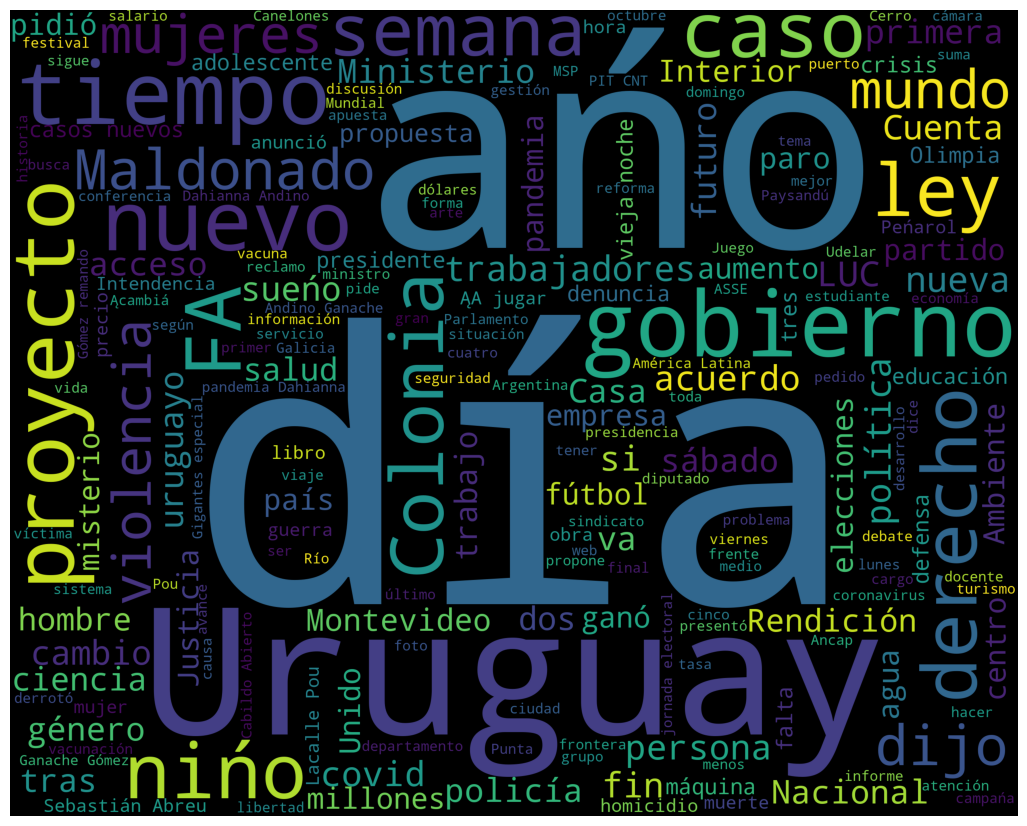

Palabras neutras black


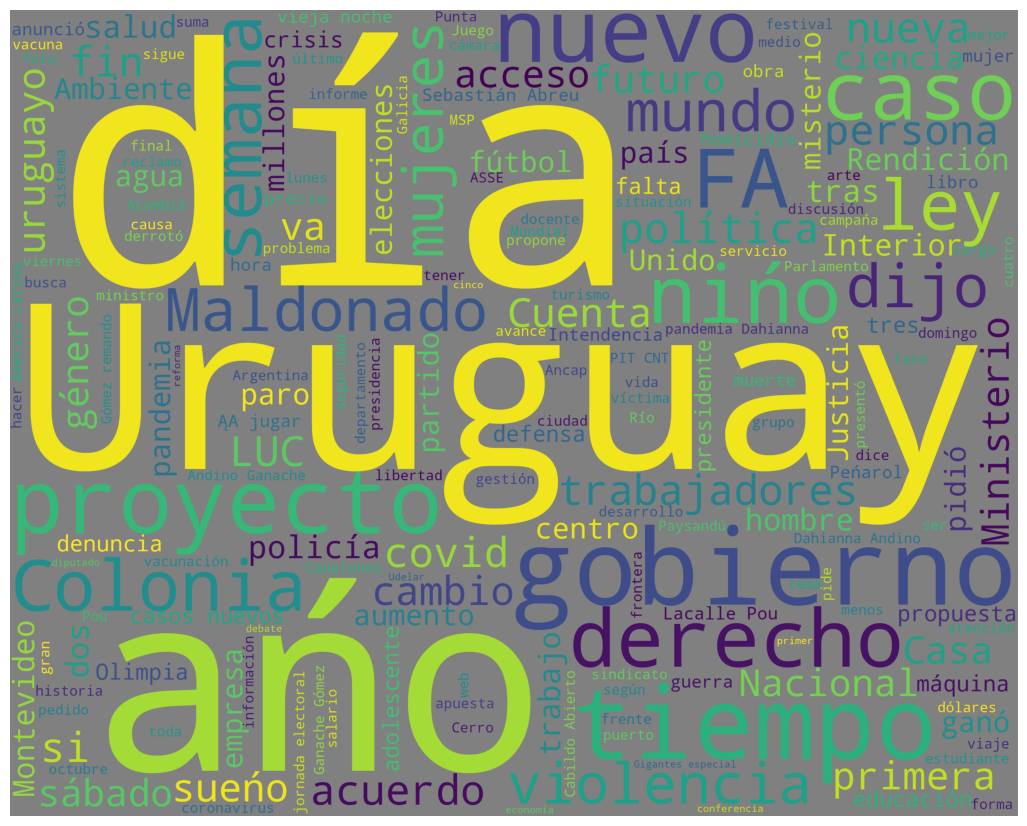

In [13]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    ''' Limpio el texto eliminando hashtags, menciones, links y retweets.
    '''
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('¿')
                                and not word.startswith('¡')
                                and not word.startswith('"')
                                and not word.endswith('?')
                                and not word.endswith('!')
                                and not word.endswith('"')
                                and word != '$'
                            ])
    wordcloud = WordCloud(stopwords=stopwords.words("spanish"),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Palabras positivas")
wordcloud_draw(data_sent_ladiar_pos,'white')
print("Palabras negativas")
wordcloud_draw(data_sent_ladiar_neg)
print('Palabras neutras', 'black')
wordcloud_draw(data_sent_ladiar_neu, 'grey')